<a href="https://colab.research.google.com/github/Deva0604/DataVisualization/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Data Visualization with Kaggle Dataset
This notebook demonstrates simple data visualizations using the Iris dataset from Kaggle

## Dataset: Iris Flower Dataset
One of the most famous beginner-friendly datasets for classification and visualization

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the Iris dataset from a public URL
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

# Read the CSV file
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (150, 5)
Rows: 150, Columns: 5


In [3]:
# Display first few rows
print("Dataset Preview:")
df.head(10)

Dataset Preview:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
# Dataset information
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("Column Names:", df.columns.tolist())
print("\nSpecies Types:", df['species'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Column Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Species Types: ['setosa' 'versicolor' 'virginica']


## Visualization 1: Bar Chart - Count of Each Species

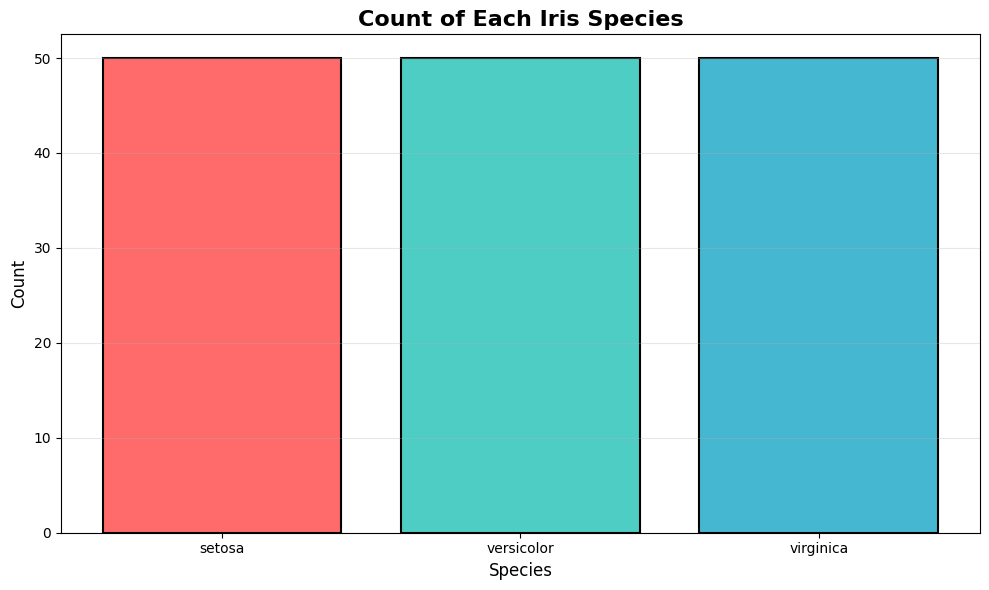

In [5]:
plt.figure(figsize=(10, 6))
species_counts = df['species'].value_counts()
plt.bar(species_counts.index, species_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=1.5)
plt.title('Count of Each Iris Species', fontsize=16, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 2: Scatter Plot - Sepal Length vs Sepal Width

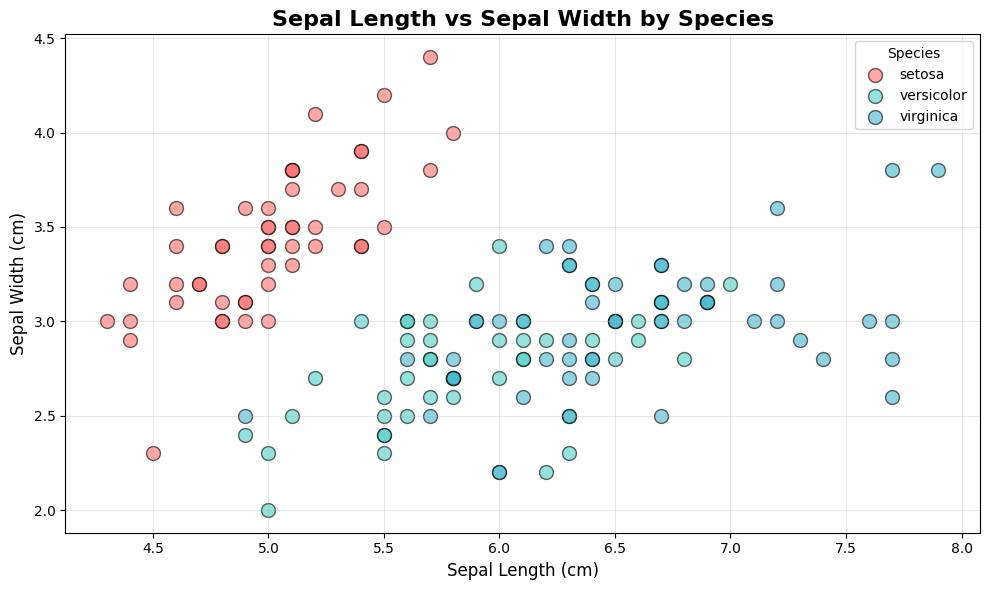

In [6]:
plt.figure(figsize=(10, 6))
species_list = df['species'].unique()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for species, color in zip(species_list, colors):
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'],
                label=species, color=color, s=100, alpha=0.6, edgecolor='black')

plt.title('Sepal Length vs Sepal Width by Species', fontsize=16, fontweight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.legend(title='Species', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 3: Box Plot - Petal Length Distribution

/tmp/ipython-input-3149462756.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=species_list, patch_artist=True)


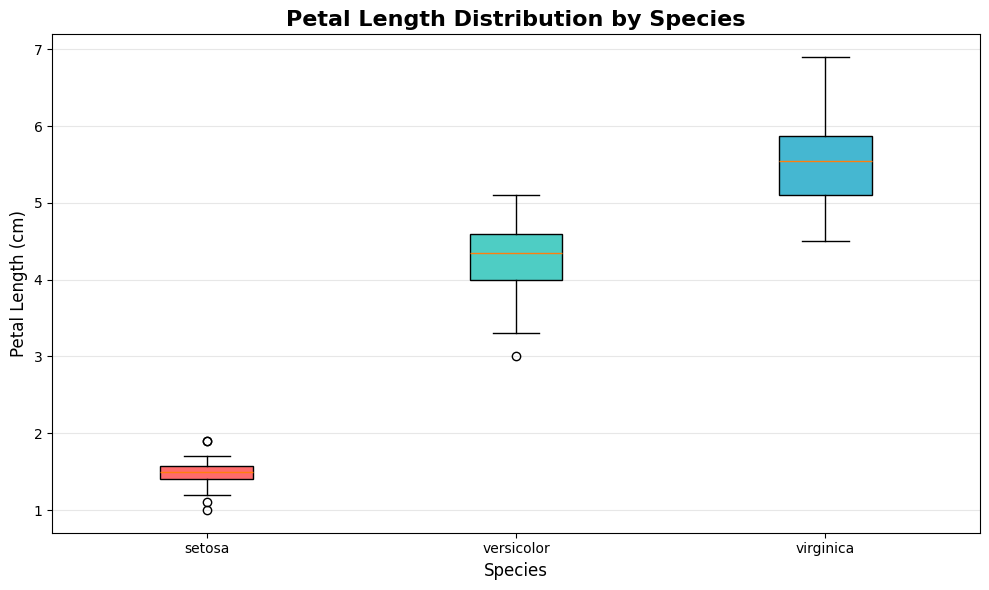

In [7]:
plt.figure(figsize=(10, 6))
species_list = df['species'].unique()
data_to_plot = [df[df['species'] == species]['petal_length'] for species in species_list]

box = plt.boxplot(data_to_plot, labels=species_list, patch_artist=True)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Petal Length Distribution by Species', fontsize=16, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 4: Histogram - Sepal Length Distribution

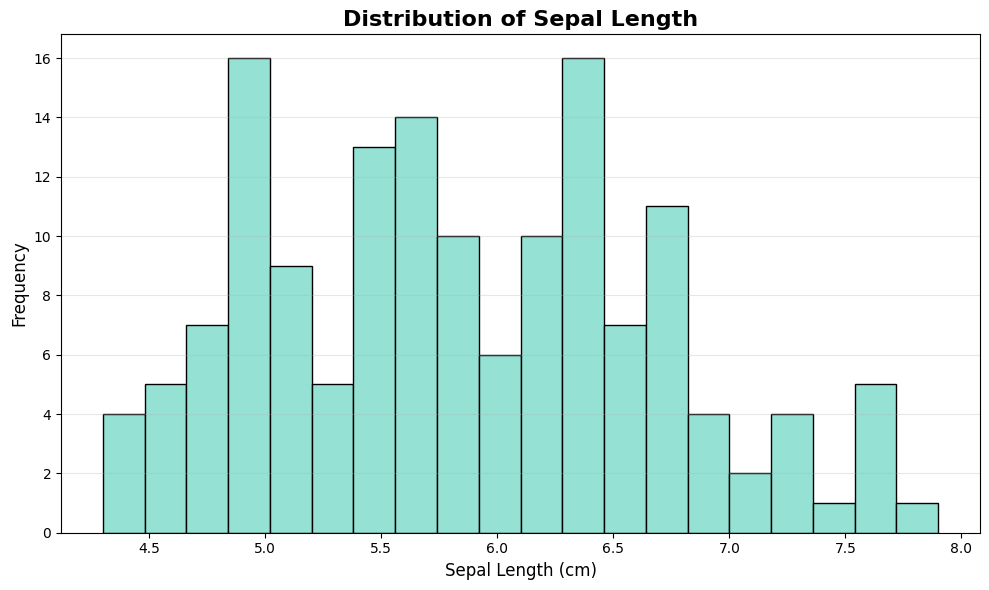

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['sepal_length'], bins=20, color='#95E1D3', edgecolor='black')
plt.title('Distribution of Sepal Length', fontsize=16, fontweight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 5: Line Plot - Average Measurements by Species

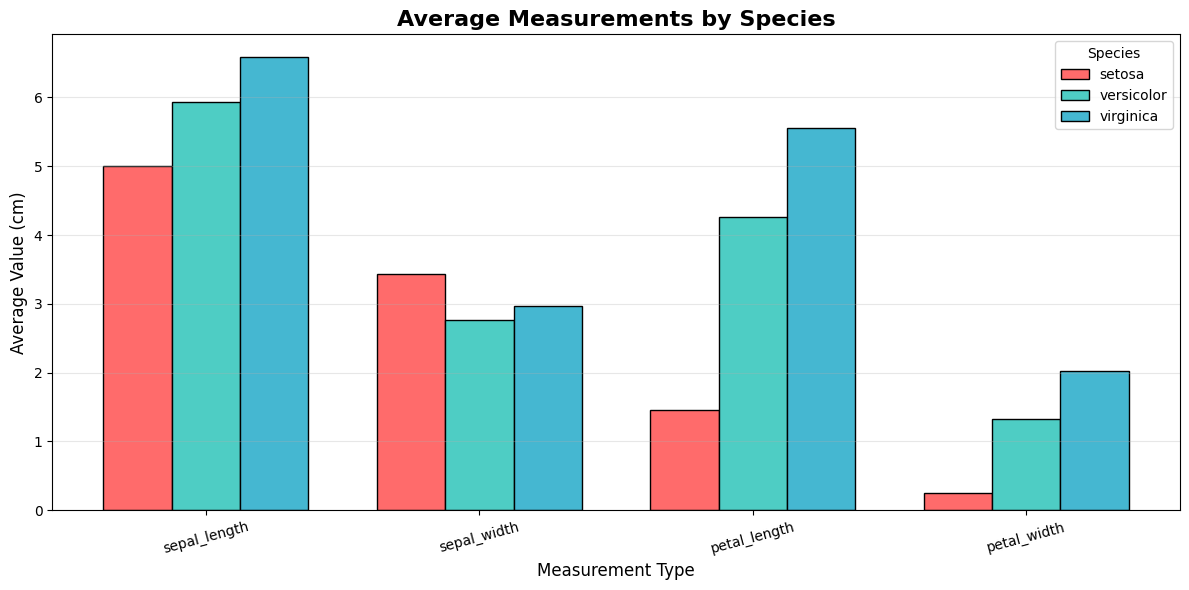

In [9]:
# Calculate average measurements for each species
avg_measurements = df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

plt.figure(figsize=(12, 6))
x = range(len(avg_measurements.columns))
width = 0.25
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (species, color) in enumerate(zip(avg_measurements.index, colors)):
    plt.bar([p + width*i for p in x], avg_measurements.loc[species],
            width=width, label=species, color=color, edgecolor='black')

plt.title('Average Measurements by Species', fontsize=16, fontweight='bold')
plt.xlabel('Measurement Type', fontsize=12)
plt.ylabel('Average Value (cm)', fontsize=12)
plt.xticks([p + width for p in x], avg_measurements.columns, rotation=15)
plt.legend(title='Species')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Summary Statistics

In [10]:
print("Dataset Summary Statistics:")
print("="*60)
df.describe()

Dataset Summary Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
print("\nSpecies-wise Summary:")
print("="*60)
df.groupby('species').describe()


Species-wise Summary:


sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## Conclusion

This notebook demonstrated basic data visualizations using the Iris dataset from Kaggle:
- Bar charts for categorical counts
- Scatter plots for relationships between variables
- Box plots for distribution comparison
- Histograms for frequency distribution
- Grouped bar charts for comparative analysis

### Next Steps:
1. Try other Kaggle datasets like Titanic or House Prices
2. Explore more visualization libraries like Seaborn or Plotly
3. Build machine learning models on this data